In [ ]:
# 결측치 처리하기 : 드롭과 채우기
# 데이터가 없으면 해당 행이나 열을 삭제
# 평균값, 최빈값, 중간값 등으로 데이터를 채움

In [ ]:
import pandas as pd
import numpy as np
raw_data = {
    'first_name' : ['Jason',np.nan, 'Tina', 'Jake','Amy'],
    'last_name' : ['Miller',np.nan, 'Ali', 'Milner','Cooze'],
    'age' : [42,np.nan, 36, 24,73],
    'gender' : ['m',np.nan, 'f', 'm','f'],
    'preTestScore' : [4,np.nan, np.nan, 2,3],
    'postTestScore' : [25,np.nan, np.nan, 62,70],
}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


<Axes: >

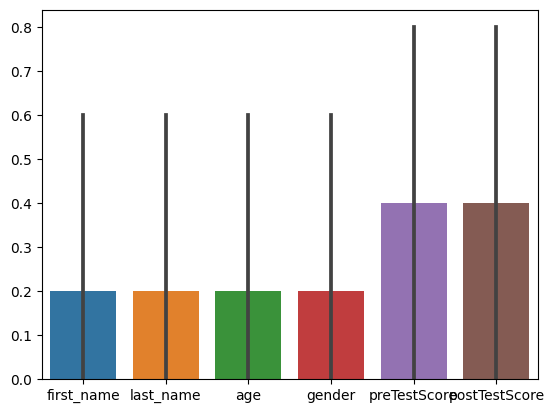

In [ ]:
# 결측치 확인 방법
df.isnull()
df.isnull().any(axis=0)
df[df.isnull().any(axis=1)]
df.isnull().sum()
df.isnull().mean()
import seaborn as sns
sns.barplot(df.isnull())

In [ ]:
# 드랍 : 결측치가 나온 열이나 행을 삭제
# dropna
df_no_missing =  df.dropna()  # 행을 삭제, 원본을 변경하지 않는다
df_no_missing

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
# dropna의 매개변수 기본은 any
# how : any , all(전체가 nan)
df_clean =  df.dropna(how='all')
df_clean

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
# 열값이 모두 nan일때 축을 추가해서 삭제
df['test'] = np.nan
# df.dropna(axis=1, how='all')

In [ ]:
df

,first_name,last_name,age,gender,preTestScore,postTestScore,test
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
# thresh 데이터의 개수를 기준으로 삭제
# thresh = 1 : 데이터가 1개이상 있어야 남김
# thresh = 5 : 데이터가 5개 이상 있어야 남김
df.dropna(axis=0, thresh=1)  # df.dropna(axis=0, how='all')
df.dropna(axis=0, thresh=5)

,first_name,last_name,age,gender,preTestScore,postTestScore,test
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
# 채우기  fillna
# 일반적으로 drop한후에 남은 값들을 채우기 위해 사용
# 평균 , 중위수 등등...
# gropuby transform 과 같이 사용하면 효율적
# 평균으로 채운다.  preTestScore
df['preTestScore'].fillna(df['preTestScore'].mean(),inplace=True)

In [ ]:
df

,first_name,last_name,age,gender,preTestScore,postTestScore,test
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
from pandas.io.sql import Iterator
# 열별 분포를 고려해서 채움
# group by함수로 각 인덱스별 성별에 따라 빈칸을 채움
df.groupby("gender")['postTestScore'].transform('mean')

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [ ]:
# 일반적인 방법
df['postTestScore'].fillna( df.groupby("gender")['postTestScore'].transform('mean'), inplace=True )

In [ ]:
df

,first_name,last_name,age,gender,preTestScore,postTestScore,test
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [51]:
# 데이터가 2건 이상인 데이터만 남겨서 저장하고
df = df.dropna(thresh=2)
df

,first_name,last_name,age,gender,preTestScore,postTestScore,test
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN
